# Linear Classifier Demo

This demo will explain what a **linear classifier** is, introduce some of the fundamental ideas in machine learning, and show it working on a toy dataset.

A classifier is an algorithm that is given many **training examples** of two categories of things and learns to distinguish between them. You choose the categories based on the application at hand. A good running example in our case could be the categories "patient with flu" and "patient without flu," but you could also imagine that pedestrian and not pedestrian or cat and dog might be relevant categories in other use cases. When you have successfully trained a classifier, you have a **model**.

Each training example will contain a number of data points, called **features**, that the model can use to make good predictions. A doctor uses features like age, weight, has asthma or not, etc. when determining if a patient has the flu. Similarly, our model will have access to this information to make a decision.

A sensible way to organize all this information is in a table, where each row is one training example and each column is a single feature. Just to give you an idea of what this would look like:

|Patient|Age|Weight|Has Asthma|Flu?|
|-----|---|------|:----------:|----|
|Alice|24|115|No|No|
|Bob|80|200|Yes|Yes|
|Charles|50|150|Yes|No|
|Dan|12|90|No|Yes|
|$\vdots$|$\vdots$|$\vdots$|$\vdots$|$\vdots$|

The TL;DR on classification is the following: using the first 4 columns of the table above, can you figure out the corresponding entries in the last column on the table?

Now we get to the demo part! The first step is to put the table in our computer's memory. Computer scientists like their data to be in the form of a **matrix**, a table of numbers, because they are easy to manipulate. Thus, we will have to turn "Yes" and "No" into numbers. 1 and 0 are reasonable choices.

In [16]:
import numpy as np

# create table
data = np.array([[24, 115, 0, 0],
                 [80, 200, 1, 1],
                 [50, 150, 1, 0],
                 [12,  90, 0, 1]])

X = data[:, :-1] # first 4 columns
y = data[:, -1] # last column

Whenever we have data, it is always a good idea to plot it. If you see a light blue plane, ignore it for now. We will come back to it later.

<IPython.core.display.Javascript object>


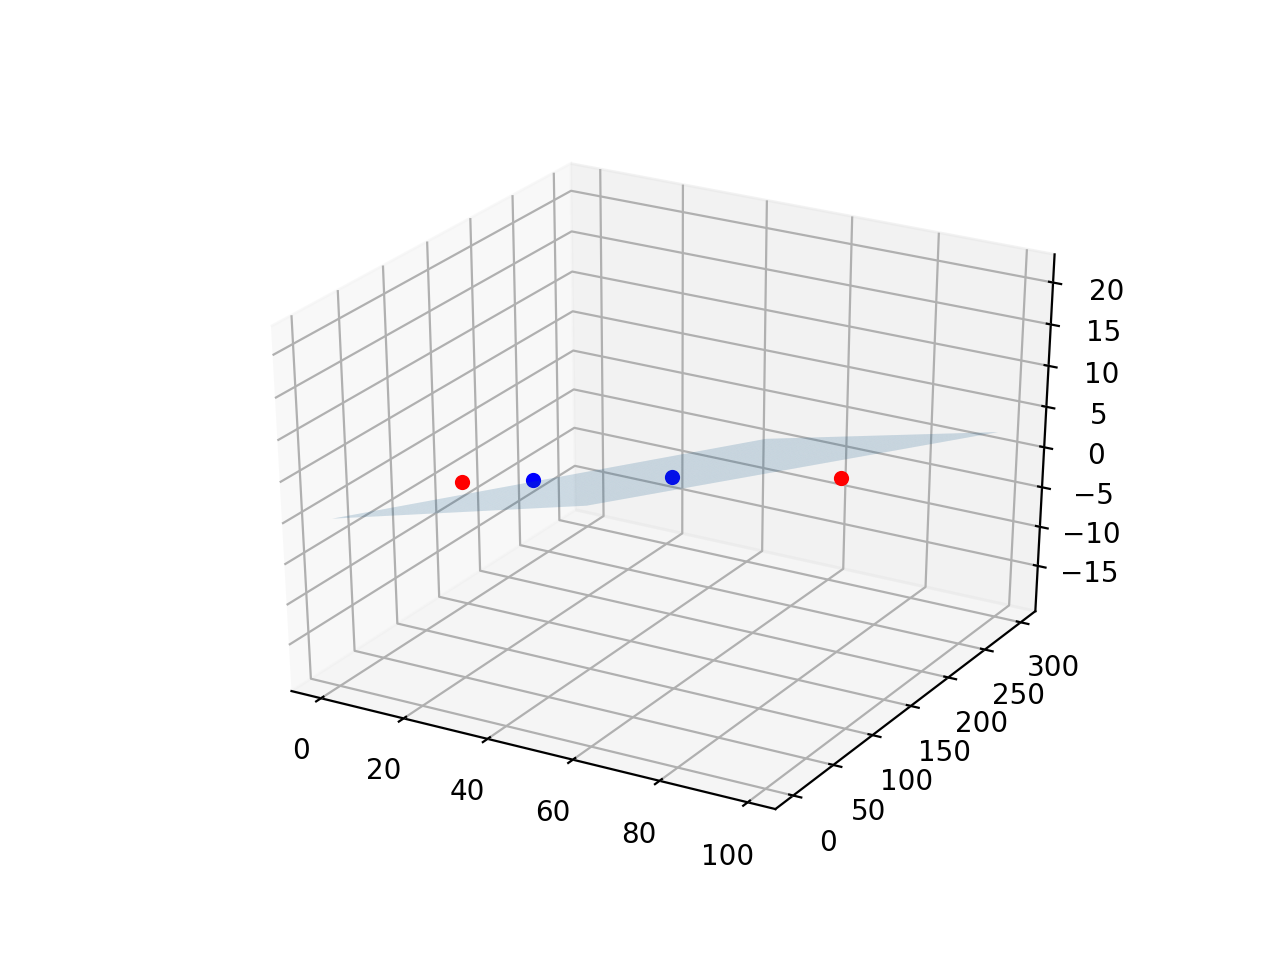

In [11]:
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

for xi, yi in zip(X, y):
    # Red for has flu, blue for does not have flu
    c = 'r' if yi else 'b'
    ax.scatter(xi[0], xi[1], xi[2], c=c)

From the plot above, a simple idea could be to try to draw a plane so that all the blue points are one side and the red ones are on the other. In this case, it might be a little tricky, but it's a good first start.

Using a plane as the **decision boundary** (the place that marks one category from another) is called **linear classification**. Conveniently, there is a software library called `sklearn` that will do the linear classification process for us. Don't worry too much about how it works internally; we can just treat it like a magic black box for this demo.

In [3]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X, y)

Let's see how well the model works.

In [15]:
clf.predict(X), y

(array([0, 1, 1, 0]), array([0, 1, 0, 1]))

Hmmm...looks like our model was wrong about Charles. Now we plot the decision boundary plane in light blue.

In [17]:
w = clf.coef_[0]
xx, yy = np.meshgrid(range(100), range(300))
z = (-w[0] * xx - w[1] * yy) * 1. /w[2]
ax.plot_surface(xx, yy, z, alpha=0.2)

Take a look at the point in the 3D plot that corresponds to Charles. His age makes him a little too close to the decision boundary plane. Let's see what the model thinks would happen if Charles were ten years younger:

In [18]:
charles = np.expand_dims(X[2,:], axis=0) - np.array([10, 0, 0])
print(charles)
clf.predict(charles)

[[ 40 150   1]]


array([0])

# Summary

We actually did quite a lot in this demo. Let's think about the steps we took and how they might be different for another classification problem:

1. Get data from somewhere. In this demo, we just made up some data. In general, we have to find a trusted source or collect information ourselves.
2. Put the data in a nice form for a computer. In this demo, we turned "Yes" and "No" into 0 and 1. In general, we might need to fill in missing data or standardize units, etc.
3. Plot the data. 
4. Pick a model. In this demo, we assumed that a line/plane could separate the data. In general, we might have to choose something more complex.
5. Train the model. In this demo, we let `sklearn` do the work for us. In general, we may want more control over all the knobs of our more complex model.
6. See how well the model works on the data it was trained on. In this demo, we saw that the model made a mistake because the decision boundary was too close.
7. When step 6 works, see how well the model works on data it never saw. In this demo, step 6 didn't work. Our job is to now decide which of steps 1 - 5 could be improved or redone for better performance.